# Credit Card Fraud Detection using Logistic Regression - Mini Project - Verzeo
Date : 03-08-2019   
Author : Pranav M S

### Importing Necessary Libraries for Plotting Confusion Matrix and ROC Curve Functions

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
from imblearn.over_sampling import ADASYN 
from collections import Counter
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
%matplotlib inline

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sn.set_palette(flatui)

### ```plot_confusion_matrix``` function to Plot Confusion Matrix

In [2]:
def plot_confusion_matrix(cm, classes, title, cmap):
    "plotting confusion matrix"
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    classnames = classes
    plt.title(title)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    tick_marks = np.arange(len(classnames))
    plt.xticks(tick_marks, classnames, rotation=0)
    plt.yticks(tick_marks, classnames)
    s = [['TN','FP'], ['FN', 'TP']]
 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

### ```plot_roc``` function to Plot ROC Curve

In [3]:
def plot_roc(arg1, arg2, arg3):
    "a function to plot roc_auc"
    fig, ax = plt.subplots(figsize=(8, 6))
    for i, v in arg1: 
        y_score = v.predict_proba(arg2)[:, 1]
        fpr, tpr, _ = metrics.roc_curve(arg3, y_score) 
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr,lw=2, label= i + ' (area = %0.2f)' % roc_auc) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show() 

### Import Data into Dataset and Read the CSV Data Info

In [4]:
#df = pd.read_csv("https://datahub.io/machine-learning/creditcard/r/creditcard.csv")
df = pd.read_csv("creditcard.csv")
print('The dataset contains {0} rows and {1} columns.'.format(df.shape[0], df.shape[1]))
print('Normal transactions count: ', df['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', df['Class'].value_counts().values[1])

The dataset contains 284807 rows and 31 columns.
Normal transactions count:  284315
Fraudulent transactions count:  492


### Preparing The Dataset

In [5]:
X = df.iloc[:, :-1]
y = df['Class']
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.30, random_state=42) # Test size = 30%

### Plot the Histogram

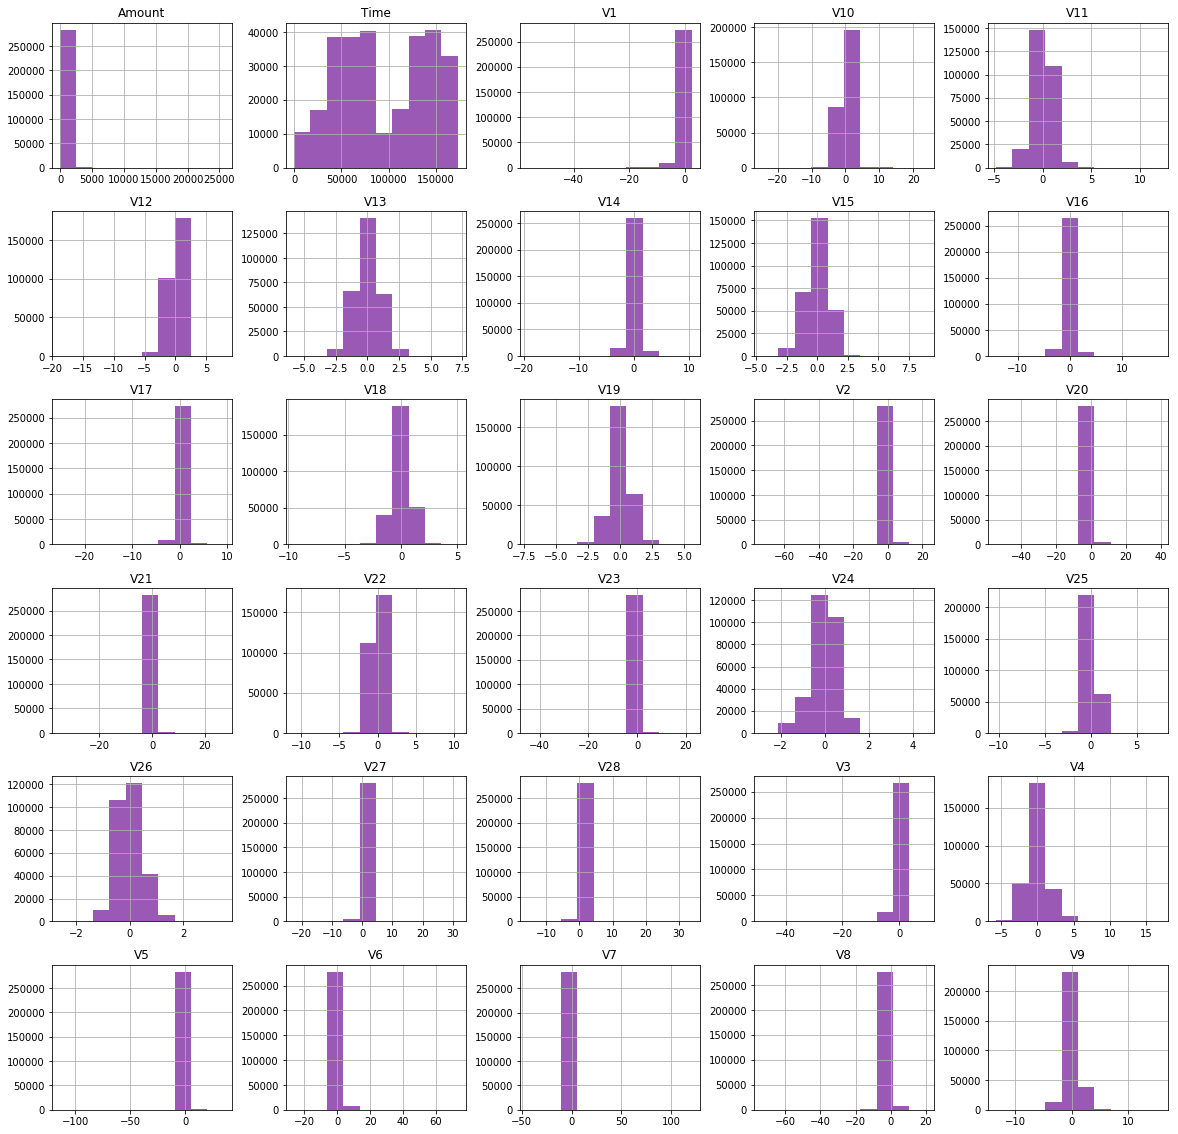

In [6]:
X.hist(figsize = (20, 20))
plt.show()

### Resampling Dataset Shape

In [7]:
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_sample(X_train, y_train)
X_train, y_train = X_res, y_res 

### 1) Logistic Regression Method

In [8]:
LGR = LogisticRegression()
LGR.fit(X_train, y_train);

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 2) Random Forest Method

In [9]:
RDF = RandomForestClassifier(random_state=0)
RDF.fit(X_train, y_train);

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Model

In [10]:
modl = [('Logistic Regression', LGR), ('Random Forest Method', RDF)]
models = [md for md in modl]

### Training and Printing Results
###### (Will take about 2-3 Minutes)

In [11]:
print()

for a,b in models:
    scores = cross_val_score(b, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, b.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(y_train, b.predict(X_train))
    classification = metrics.classification_report(y_train, b.predict(X_train))
    print('************************** {} **************************'.format(a))
    print()
    print ("Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Classification Report:" "\n", classification) 
    print()

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

************************** Logistic Regression **************************

Mean Score:  86.9%

Model Accuracy:  89.9%

Confusion Matrix:
 [[180319  18689]
 [ 21655 177381]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90    199008
           1       0.90      0.89      0.90    199036

   micro avg       0.90      0.90      0.90    398044
   macro avg       0.90      0.90      0.90    398044
weighted avg       0.90      0.90      0.90    398044


************************** Random Forest Method **************************

Mean Score:  91.5%

Model Accuracy:  100.0%

Confusion Matrix:
 [[199006      2]
 [     0 199036]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199008
           1       1.00      1.00      1.00    199036

   micro avg       1.00      1.00      1.00    398044
   macro avg       1.00      1.00      1.00    398044
we

### Testing Model and Plotting Graph


************************** Model Test Results **************************

********** Logistic Regression **********
Model Accuracy:  90.5%

Confusion Matrix:
 [[77190  8117]
 [    6   130]]

Matrix Plot : 


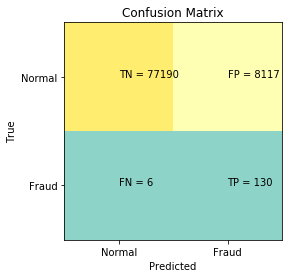


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     85307
           1       0.02      0.96      0.03       136

   micro avg       0.90      0.90      0.90     85443
   macro avg       0.51      0.93      0.49     85443
weighted avg       1.00      0.90      0.95     85443


********** Random Forest Method **********
Model Accuracy:  99.9%

Confusion Matrix:
 [[85285    22]
 [   26   110]]

Matrix Plot : 


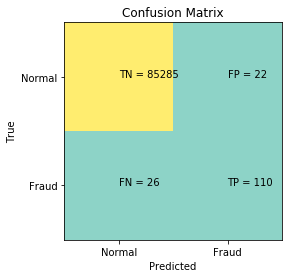


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.81      0.82       136

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443


ROC Curve : 


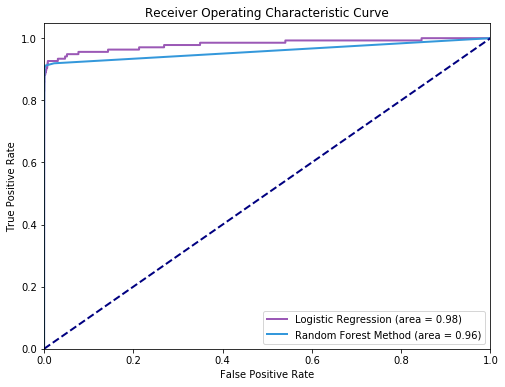

In [13]:
classnf = {'Normal':0, 'Fraud':1}
print()
print('************************** Model Test Results **************************' "\n")   

for a, b in models:
    accuracy = metrics.accuracy_score(y_test, b.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(y_test, b.predict(X_test))
    classification = metrics.classification_report(y_test, b.predict(X_test))   
    print('********** {} **********'.format(a))
    print ("Model Accuracy: ",  '{}%'.format(np.round(accuracy, 3) * 100))
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print("Matrix Plot : ")
    plot_confusion_matrix(confusion_matrix, classes = list(classnf.keys()), title='Confusion Matrix', cmap=plt.cm.Set3)
    print() 
    print("Classification Report:" "\n", classification) 
    print()
print("ROC Curve : ")
plot_roc(arg1=models, arg2=X_test, arg3=y_test)